1.	Pemahaman Masalah
Memudahkan bisnis, untuk menyesuaikan produk dengan kebutuhan pelanggan (target pelanggan) dari berbagai jenis pelanggan

2.  Dataset :   https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("/content/drive/MyDrive/marketing_campaign.csv", delimiter="\t")

In [5]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
data.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1569,1081,1957,PhD,Married,75283.0,1,2,27-03-2013,26,733,...,4,0,0,0,0,0,0,3,11,0
1192,2315,1960,Graduation,Divorced,58401.0,0,1,20-04-2014,55,10,...,4,0,0,0,0,0,0,3,11,0
735,7875,1949,Graduation,Married,72025.0,0,0,29-04-2014,46,967,...,2,0,1,1,1,0,0,3,11,1
273,6336,1960,Graduation,Married,29315.0,1,1,06-04-2014,55,13,...,6,0,0,0,0,0,0,3,11,0
1251,8534,1952,Graduation,Married,67433.0,0,2,16-07-2013,51,615,...,4,0,1,0,0,0,0,3,11,0
919,4637,1954,PhD,Single,74637.0,0,0,18-05-2013,73,960,...,3,0,0,0,1,0,0,3,11,0
1648,6409,1967,Graduation,Divorced,57136.0,0,0,18-05-2013,18,267,...,6,0,0,0,0,0,0,3,11,1
1278,2931,1978,Graduation,Divorced,71847.0,0,0,21-09-2012,95,737,...,3,0,0,0,1,0,0,3,11,0
394,7683,1968,Master,Married,70777.0,0,1,25-02-2014,80,554,...,3,0,0,0,0,0,0,3,11,0
1527,7998,1958,Graduation,Together,28087.0,1,1,11-12-2012,77,53,...,7,0,0,0,0,0,0,3,11,0


## DATA CLEANSING

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Observation:

Data contains 29 columns with 2240 rows

missing value ada di kolom income

In [8]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
data.isna().sum() * 100 / len(data)

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [10]:
((data.shape[0] - data.dropna().shape[0])/data.shape[0])*100

1.0714285714285714

In [11]:
data['Income'].fillna(data['Income'].median)

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2240, dtype: object

In [12]:
data = data.dropna()

In [13]:
data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

Success removing NULL values!

In [15]:
data = data.drop_duplicates()

In [16]:
data.duplicated().sum()

0

### EDA

In [17]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [18]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [19]:
data['age']=2024-data["Year_Birth"]

In [20]:
pd.set_option('display.max_columns', None)
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,67
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,70
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,59
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,40
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,43
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,57
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,53
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,39
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,50
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,74


In [21]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [22]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'age'],
      dtype='object')

In [23]:
data["shopping"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

In [24]:
data['relationship']=data['Marital_Status'].replace({'Married':'in_relationship' , 'Together':'in_relationship' , 'Single':'single' , 'Divorced':'single',
                                                    'YOLO':'single' , 'Absurd':'single' , 'Widow':'single' ,'Alone':'single'})
data["Children"]=data["Kidhome"]+data["Teenhome"]

In [25]:
data['members_home']= data["Children"]+data['relationship'].replace({'single':0,'in_relationship':1})

In [34]:
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

In [26]:
data['Purchases'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3']
+ data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    1
2238    0
2239    1
Length: 2216, dtype: int64

In [27]:
data['num_purchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']

In [28]:
data.drop(labels=['Marital_Status','ID','Year_Birth'
                  ,'Dt_Customer',
                  'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts',
                  'MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                'AcceptedCmp2','Z_CostContact', 'Z_Revenue',"Recency", "Complain",], axis=1, inplace=True)

In [29]:
pd.set_option('display.max_columns', None)
data.head(10)

,Education,Income,Kidhome,Teenhome,Response,age,shopping,relationship,Children,members_home,Purchases,num_purchases
0,Graduation,58138.0,0,0,1,67,1617,single,0,0,0,25
1,Graduation,46344.0,1,1,0,70,27,single,2,2,0,6
2,Graduation,71613.0,0,0,0,59,776,in_relationship,0,1,0,21
3,Graduation,26646.0,1,0,0,40,53,in_relationship,1,2,0,8
4,PhD,58293.0,1,0,0,43,422,in_relationship,1,2,0,19
5,Master,62513.0,0,1,0,57,716,in_relationship,1,2,0,22
6,Graduation,55635.0,0,1,0,53,590,single,1,1,0,21
7,PhD,33454.0,1,0,0,39,169,in_relationship,1,2,0,10
8,PhD,30351.0,1,0,1,50,46,in_relationship,1,2,0,6
9,PhD,5648.0,1,1,0,74,49,in_relationship,2,3,1,2


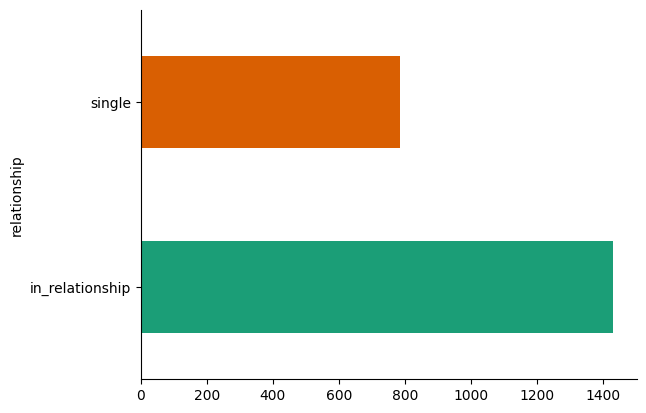

In [ ]:
# @title relationship

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('relationship').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Income', ylabel='Count'>

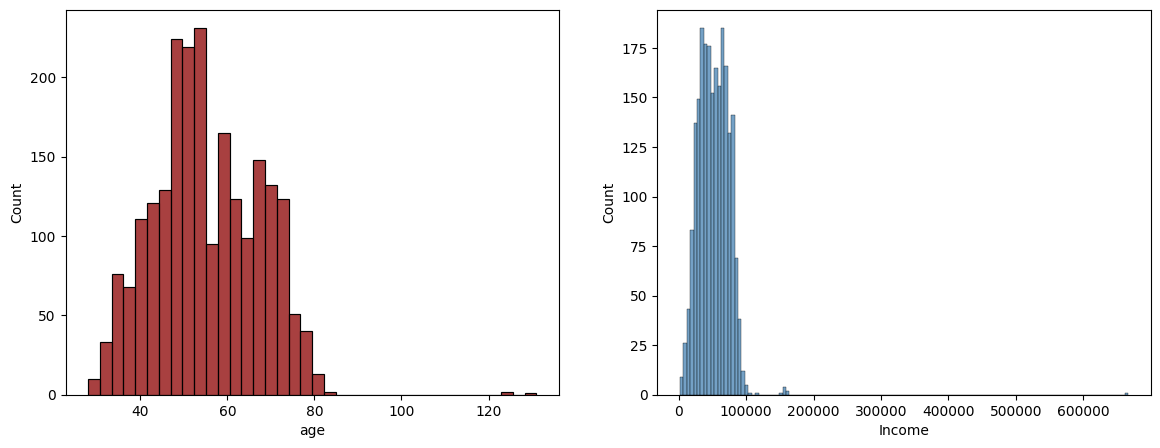

In [ ]:
plt.figure(figsize=(14, 5))
plt.subplot(1,2,1)
sns.histplot(data,x='age',color = "darkred")
plt.subplot(1,2,2)
sns.histplot(data,x='Income',color='steelblue')

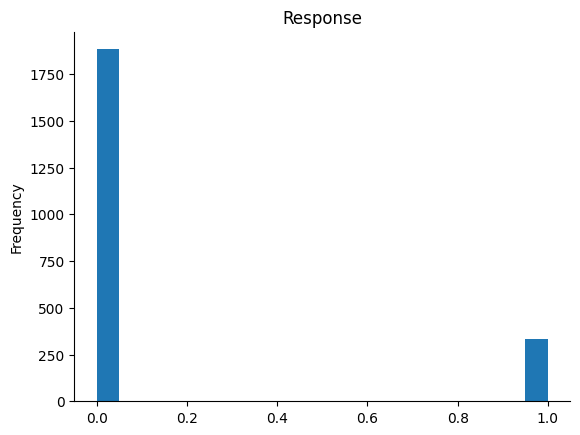

In [ ]:
# @title Response

from matplotlib import pyplot as plt
data['Response'].plot(kind='hist', bins=20, title='Response')
plt.gca().spines[['top', 'right',]].set_visible(False)

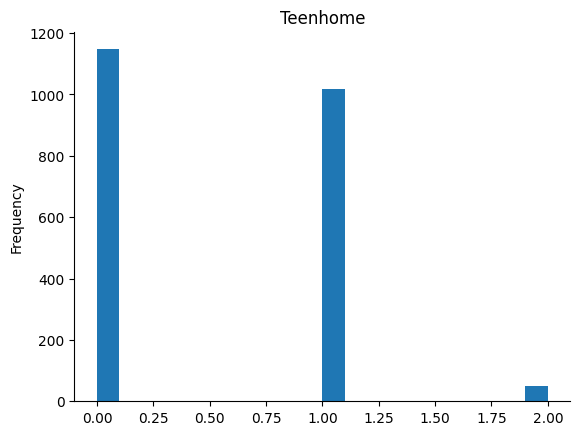

In [ ]:
# @title Teenhome

from matplotlib import pyplot as plt
data['Teenhome'].plot(kind='hist', bins=20, title='Teenhome')
plt.gca().spines[['top', 'right',]].set_visible(False)

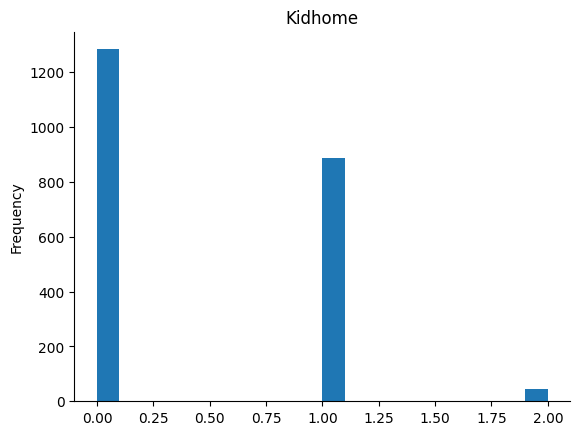

In [ ]:
# @title Kidhome

from matplotlib import pyplot as plt
data['Kidhome'].plot(kind='hist', bins=20, title='Kidhome')
plt.gca().spines[['top', 'right',]].set_visible(False)

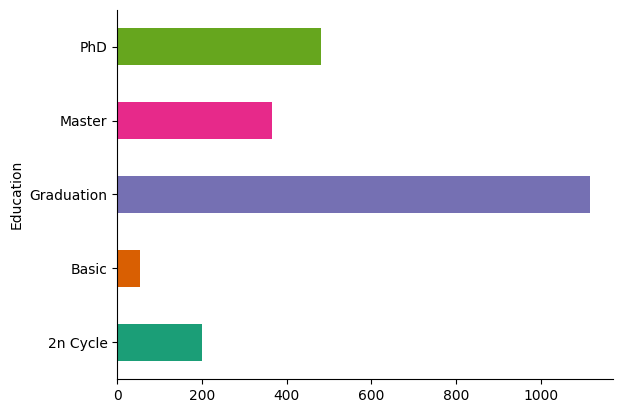

In [ ]:
# @title Education

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

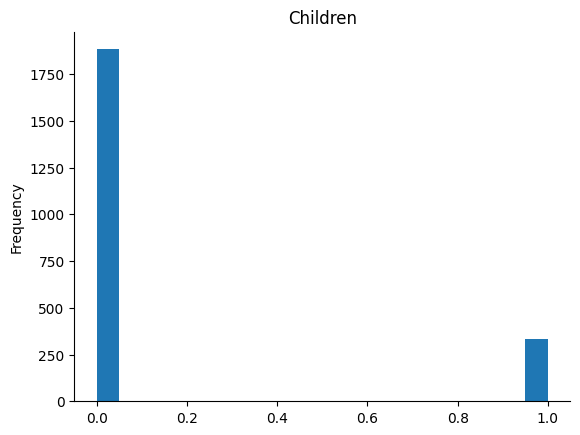

In [ ]:
# @title Children

from matplotlib import pyplot as plt
data['Response'].plot(kind='hist', bins=20, title='Children')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [30]:
data.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Response', 'age',
       'shopping', 'relationship', 'Children', 'members_home', 'Purchases',
       'num_purchases'],
      dtype='object')

In [31]:
data["shopping"].value_counts()

22      18
46      18
57      16
55      15
44      15
        ..
108      1
1493     1
936      1
528      1
843      1
Name: shopping, Length: 1047, dtype: int64

In [32]:
To_Plot = [ "Education", "Income", "Children", "age", "shopping","relationship","members_home","Is_Parent","Purchases","num_purchases"]

<ipython-input-35-e1f8fc61e72b>:8: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-35-e1f8fc61e72b>:8: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-35-e1f8fc61e72b>:8: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-35-e1f8fc61e72b>:8: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
<ipython-input-35-e1f8fc61e72b>:8: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


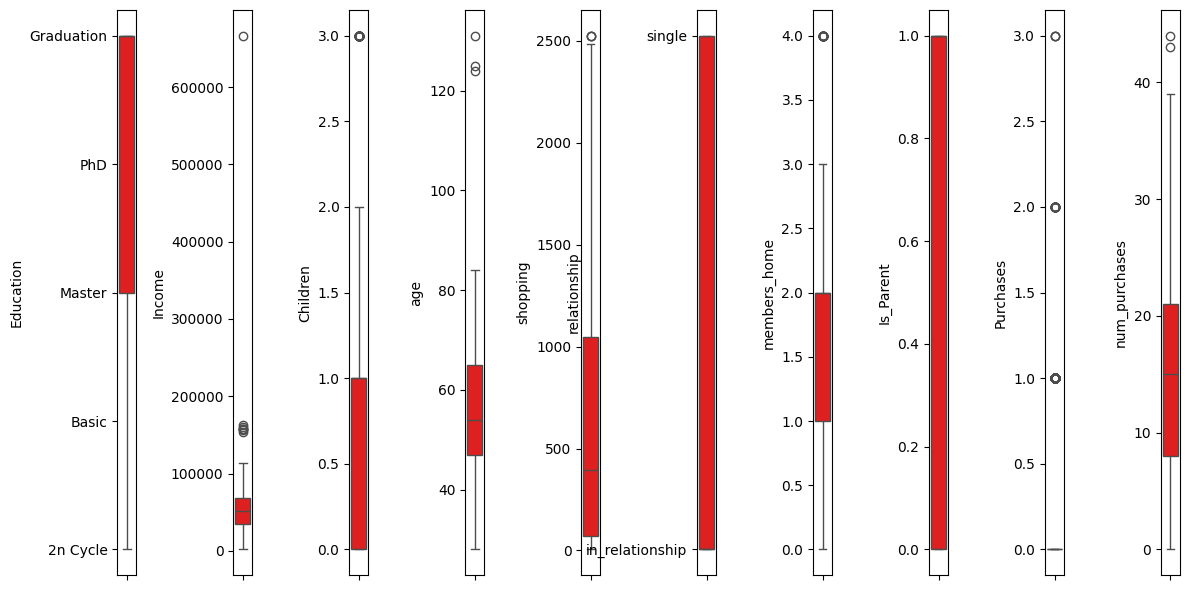

In [35]:
plt.figure(figsize=(12,6))


features = To_Plot
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='red')
    plt.tight_layout()

In [36]:
data = data[(data["age"]<80)]
data = data[(data["Income"]<100000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2185


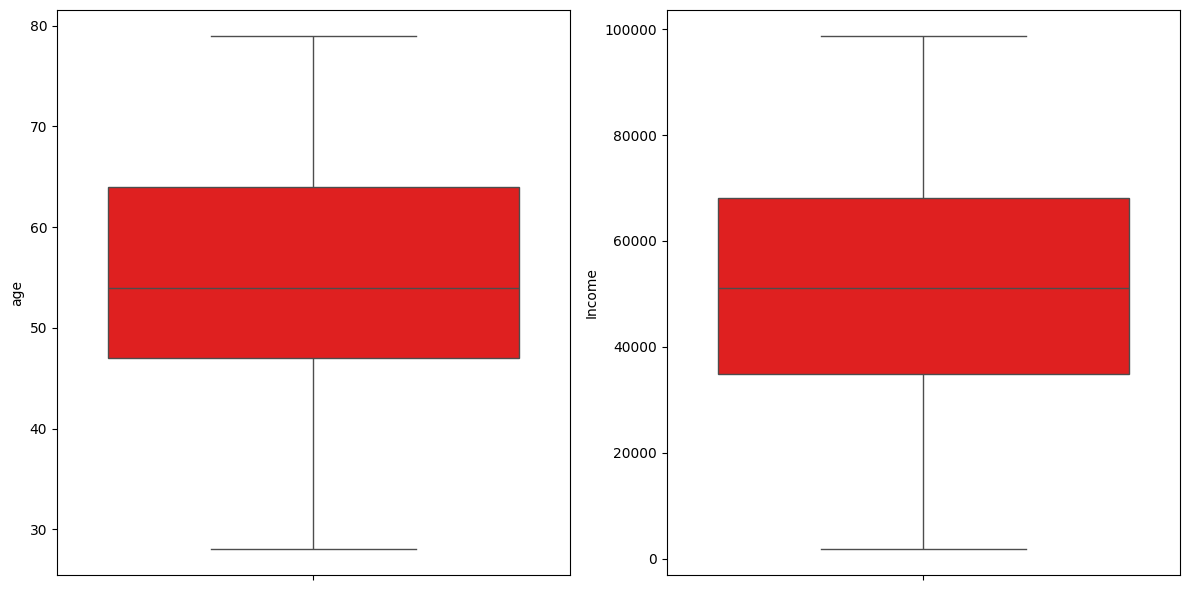

In [37]:
plt.figure(figsize=(12,6))


features = "age","Income"
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='red')
    plt.tight_layout()

OUTLIER Done drop

<ipython-input-38-ffbcdffea9f7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


<Axes: >

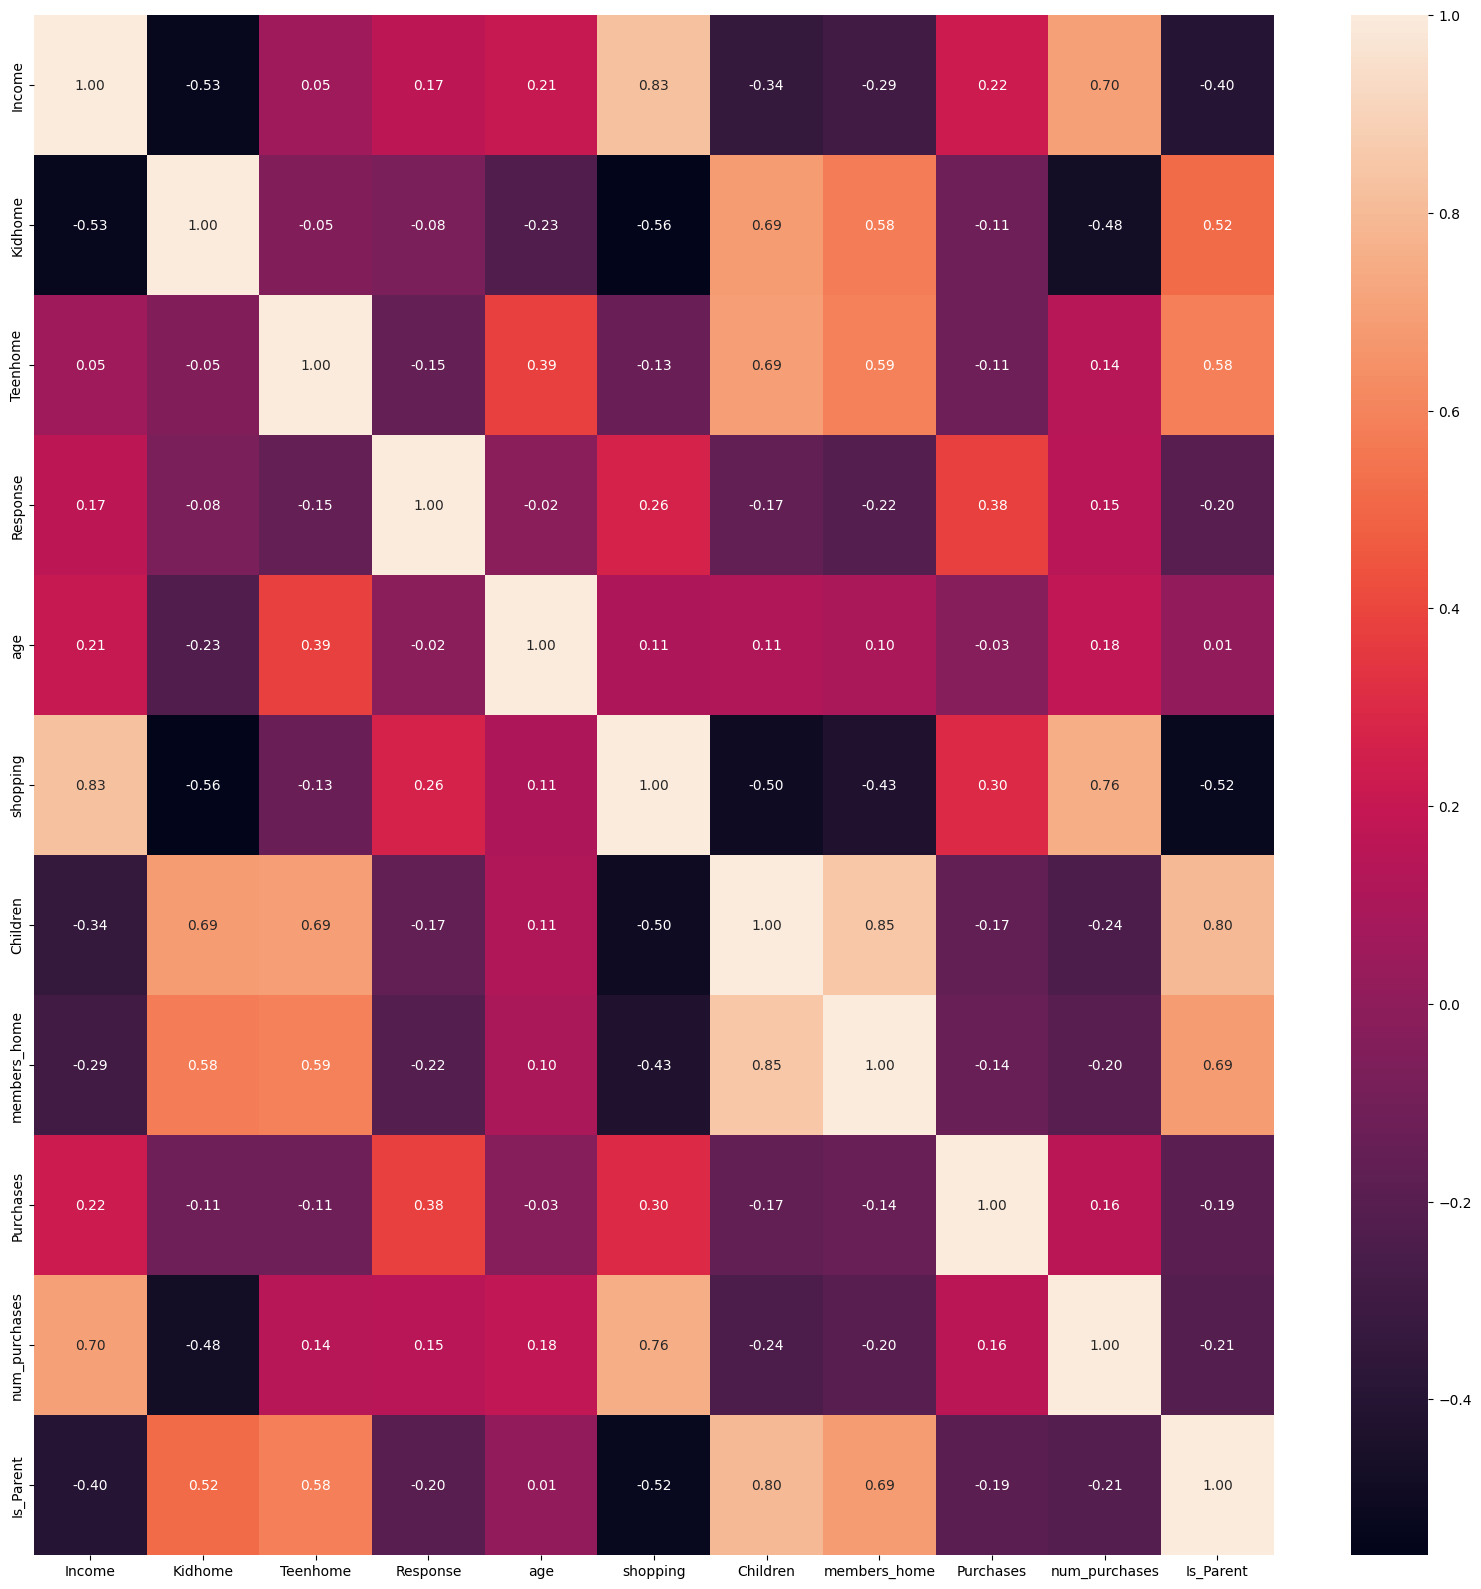

In [38]:
plt.figure(figsize=(20,20))
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2185 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Education      2185 non-null   object 
 1   Income         2185 non-null   float64
 2   Kidhome        2185 non-null   int64  
 3   Teenhome       2185 non-null   int64  
 4   Response       2185 non-null   int64  
 5   age            2185 non-null   int64  
 6   shopping       2185 non-null   int64  
 7   relationship   2185 non-null   object 
 8   Children       2185 non-null   int64  
 9   members_home   2185 non-null   int64  
 10  Purchases      2185 non-null   int64  
 11  num_purchases  2185 non-null   int64  
 12  Is_Parent      2185 non-null   int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 239.0+ KB


In [40]:
from sklearn import preprocessing
data['Education']=  preprocessing.LabelEncoder().fit_transform(data['Education'])
data['relationship']=  preprocessing.LabelEncoder().fit_transform(data['relationship'])

In [41]:
data.head()

,Education,Income,Kidhome,Teenhome,Response,age,shopping,relationship,Children,members_home,Purchases,num_purchases,Is_Parent
0,2,58138.0,0,0,1,67,1617,1,0,0,0,25,0
1,2,46344.0,1,1,0,70,27,1,2,2,0,6,1
2,2,71613.0,0,0,0,59,776,0,0,1,0,21,0
3,2,26646.0,1,0,0,40,53,0,1,2,0,8,1
4,4,58293.0,1,0,0,43,422,0,1,2,0,19,1


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.values)

In [43]:
scaled_data = pd.DataFrame(scaled_features, index=data.index, columns=data.columns)

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
data_pca = pca.fit_transform(scaled_data)

## CLUSTERING

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

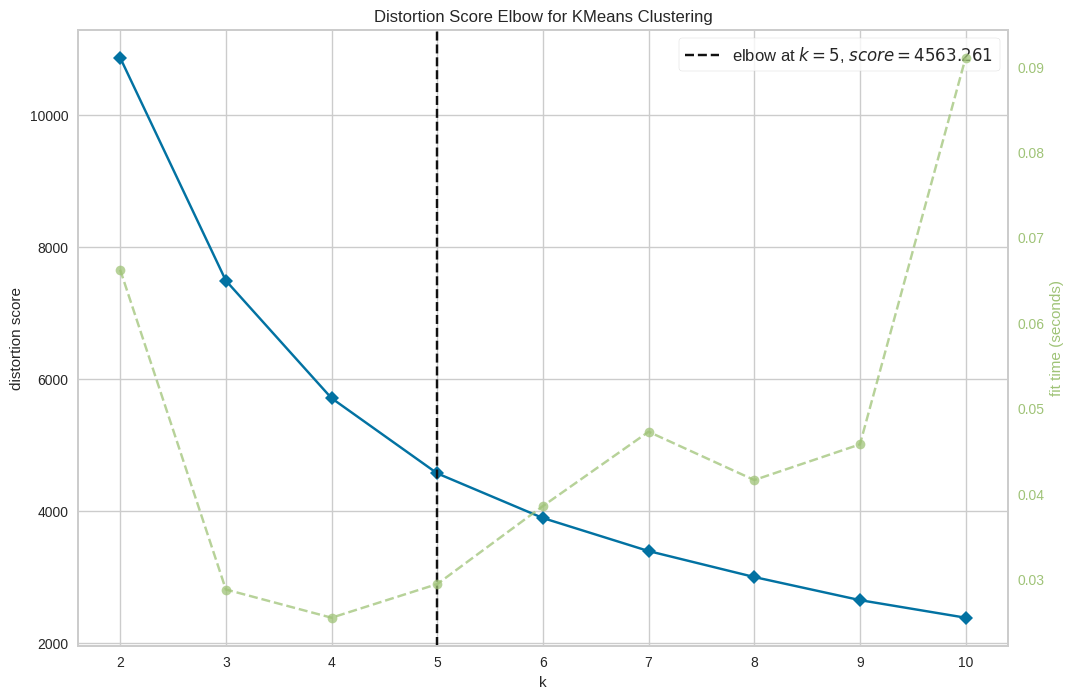

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

plt.figure(figsize=(12, 8))
elbow_graph = KElbowVisualizer(KMeans(random_state=123), k=10)
elbow_graph.fit(data_pca)
elbow_graph.show()

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(data)
X[0]

array([0.5       , 0.58124414, 0.        , 0.        , 1.        ,
       0.76470588, 0.63968254, 1.        , 0.        , 0.        ,
       0.        , 0.58139535, 0.        ])

In [47]:
!pip install yellowbrick

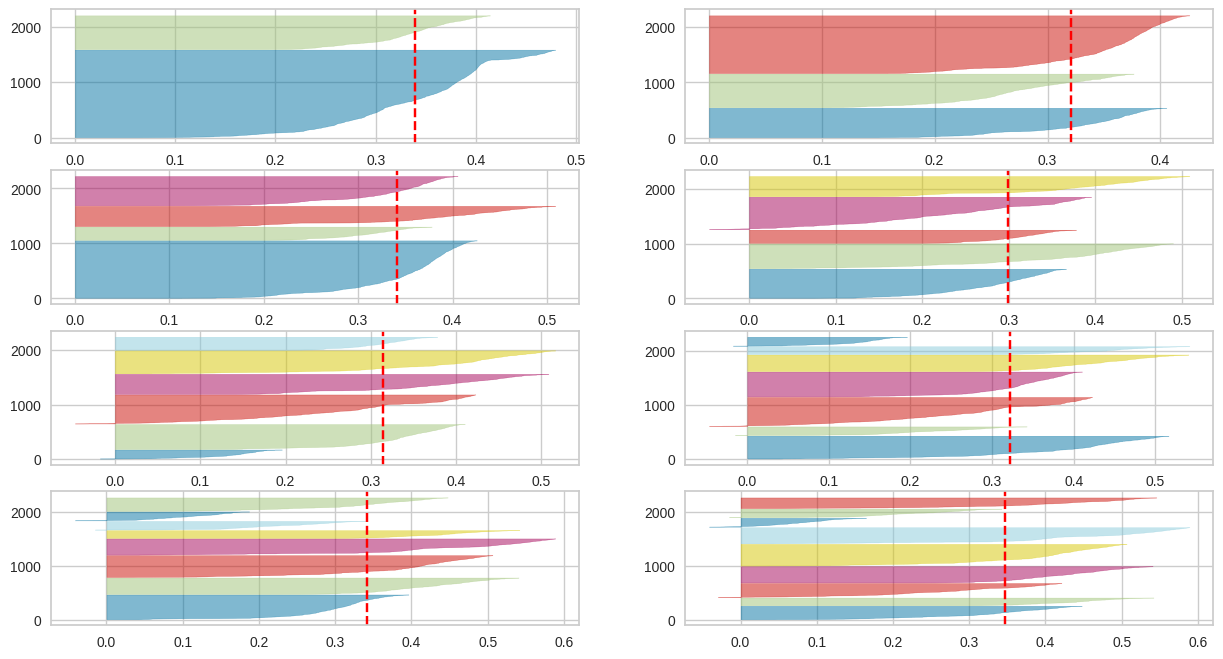

In [48]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(4, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7, 8, 9]:
    '''

    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''

    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

## number of clusters is 5

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X)

In [50]:
X_pca_df = pd.DataFrame(data=X_pca, columns=['X1', 'X2', 'X3'])

In [51]:
kmeans=KMeans(n_clusters=5, random_state=0).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [52]:
kmeans.labels_

array([3, 2, 0, ..., 3, 4, 1], dtype=int32)

In [53]:
Clusters = kmeans.labels_
X_pca_df['Clusters'] = Clusters

In [54]:
import plotly.express as px

fig = px.scatter_3d(X_pca_df, x='X1', y='X2', z='X3',
              color=X_pca_df['Clusters'])
fig.show()

In [55]:
print(X_pca_df.columns)

Index(['X1', 'X2', 'X3', 'Clusters'], dtype='object')


In [56]:
kmeans.labels_

array([3, 2, 0, ..., 3, 4, 1], dtype=int32)

Text(0.5, 1.0, 'clusters in data')

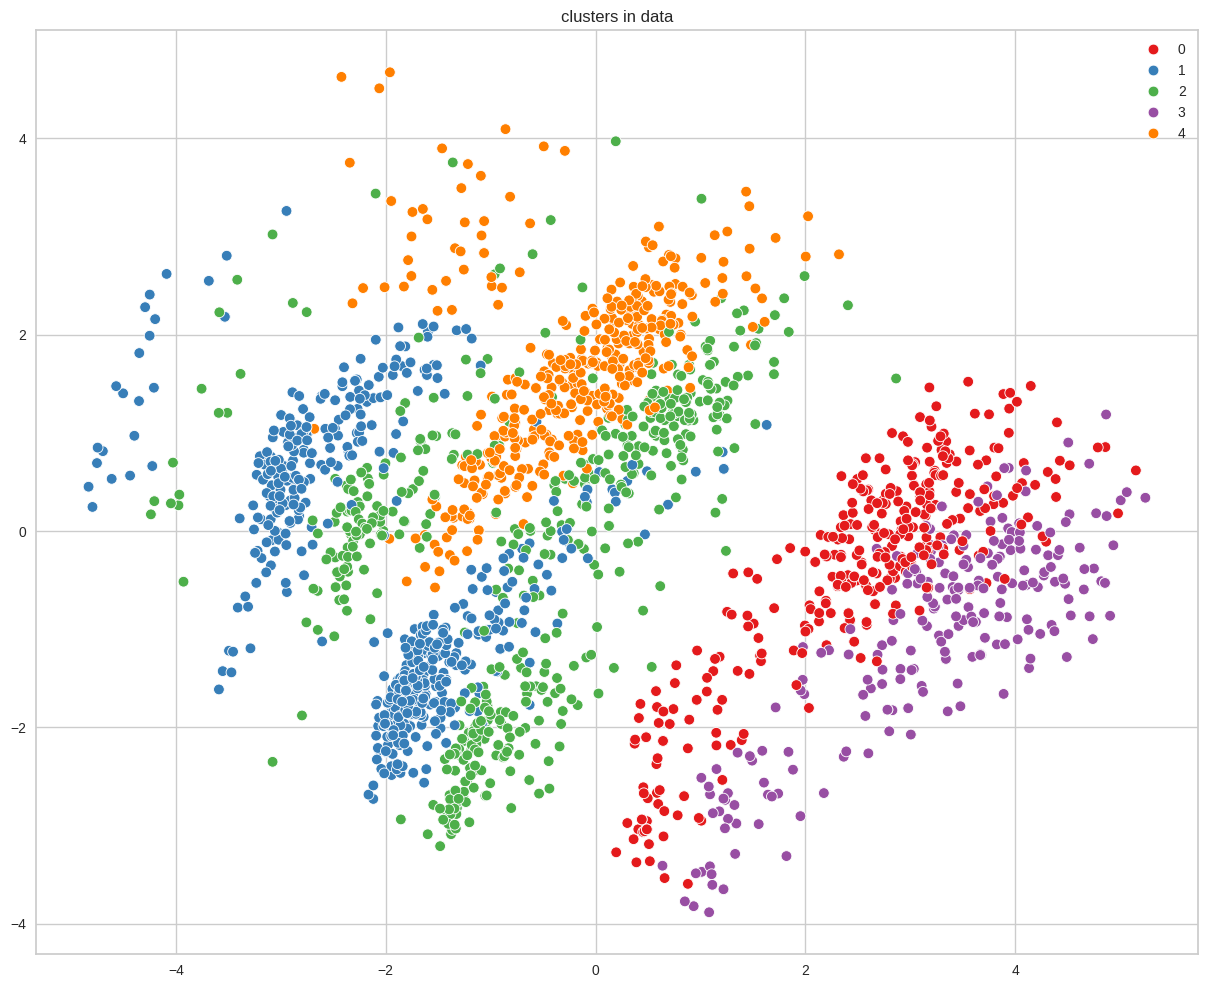

In [57]:
plt.figure(figsize=(15,12))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=kmeans.labels_,s=60, palette='Set1')
plt.title('clusters in data')

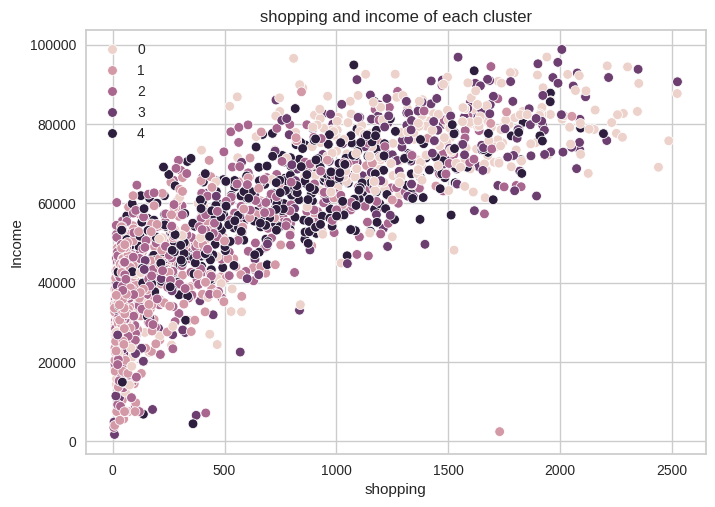

In [58]:
pl = sns.scatterplot(data = data, x=data["shopping"], y=data["Income"], hue=kmeans.labels_)
pl.set_title("shopping and income of each cluster")
plt.legend()
plt.show()

In [59]:

cluster_labels = kmeans.labels_


X_pca_df['Clusters'] = cluster_labels

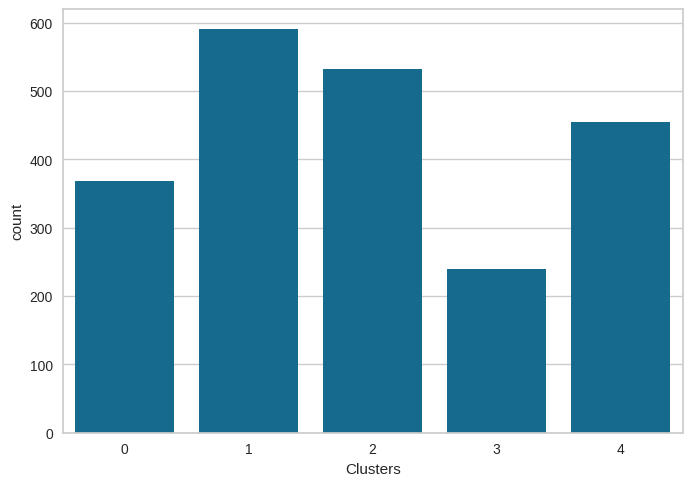

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=kmeans.labels_)

plt.xlabel('Clusters')

plt.show()

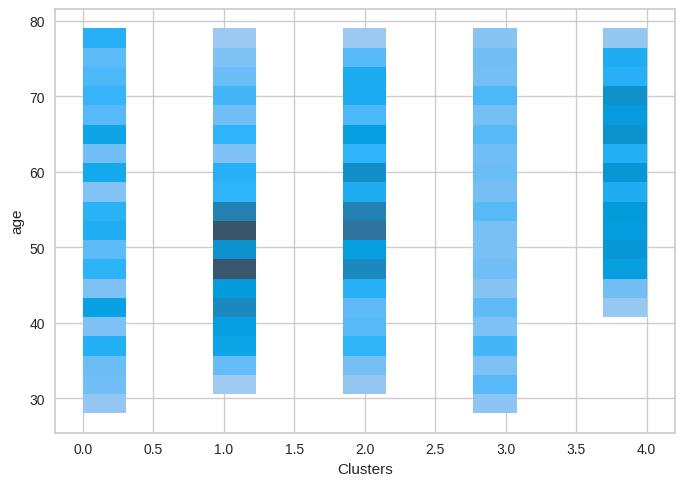

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x=kmeans.labels_, y=data['age'])
plt.xlabel('Clusters')
plt.show()

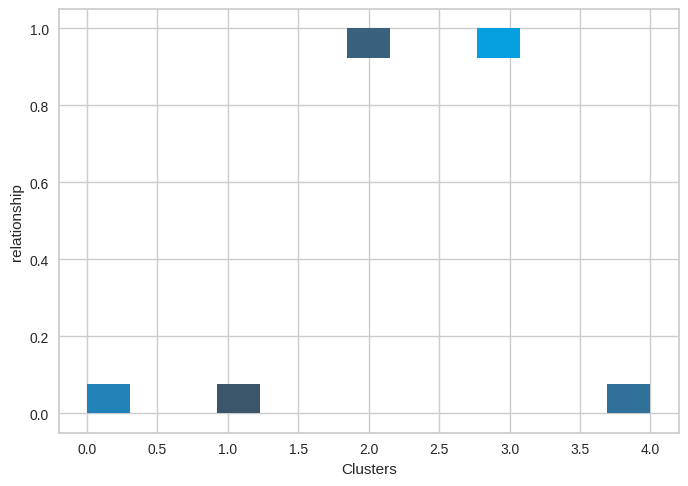

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x=kmeans.labels_, y=data['relationship'])
plt.xlabel('Clusters')
plt.show()

## EVALUATING MODELS

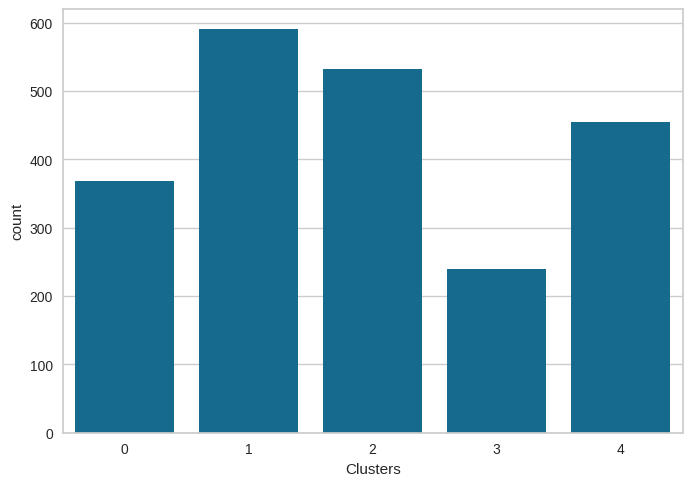

In [66]:
import seaborn as sns


sns.countplot(x=X_pca_df['Clusters'])


plt.show()

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2185 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Education      2185 non-null   int64  
 1   Income         2185 non-null   float64
 2   Kidhome        2185 non-null   int64  
 3   Teenhome       2185 non-null   int64  
 4   Response       2185 non-null   int64  
 5   age            2185 non-null   int64  
 6   shopping       2185 non-null   int64  
 7   relationship   2185 non-null   int64  
 8   Children       2185 non-null   int64  
 9   members_home   2185 non-null   int64  
 10  Purchases      2185 non-null   int64  
 11  num_purchases  2185 non-null   int64  
 12  Is_Parent      2185 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 239.0 KB


In [68]:
import pandas as pd

result_data = pd.DataFrame()


result_data['Clusters'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

25.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

25.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

20.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

<ipython-input-69-5d61da52dc27>:3: FutureWarning:



Pa

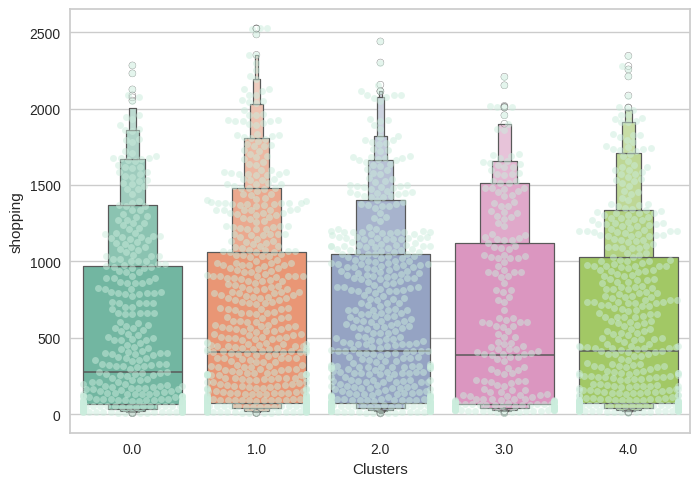

In [69]:
plt.figure()
pl=sns.swarmplot(x=result_data['Clusters'] , y=data["shopping"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=result_data['Clusters'] , y=data["shopping"], palette='Set2')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

<ipython-input-71-316c350c0a01>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

14.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10

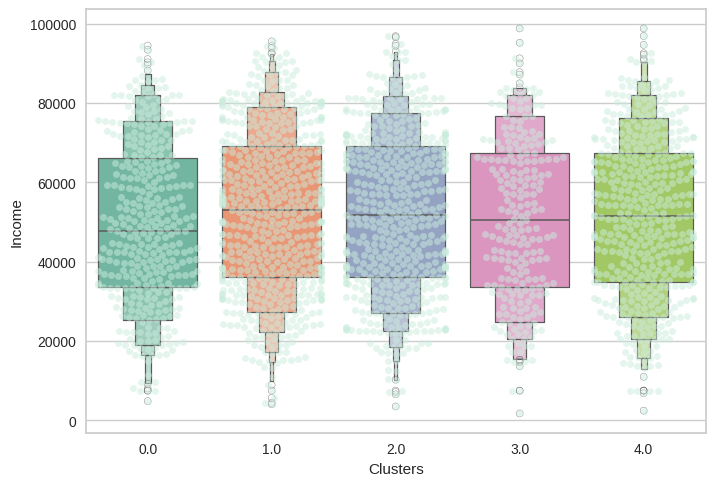

In [71]:
plt.figure()
pl=sns.swarmplot(x=result_data['Clusters'] , y=data["Income"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=result_data['Clusters'] , y=data["Income"], palette='Set2')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

90.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

93.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

93.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

82.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning:

91.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

<ipython-input-75-5b20223604e6>:3: FutureWarning:



Pa

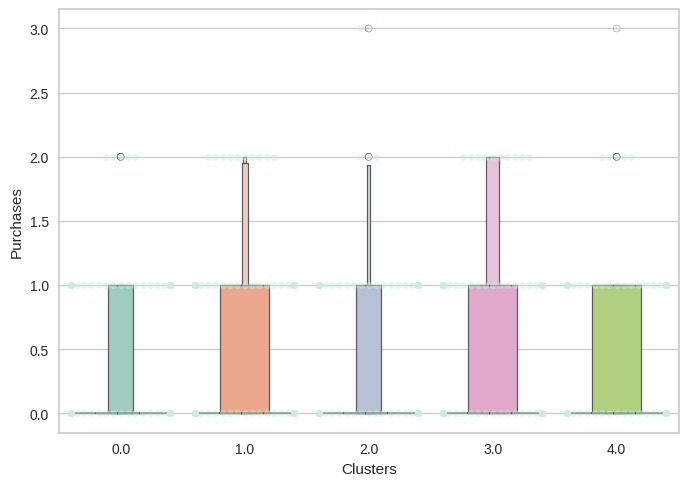

In [ ]:
plt.figure()
pl=sns.swarmplot(x=result_data['Clusters'] , y=data["Purchases"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=result_data['Clusters'] , y=data["Purchases"], palette='Set2')
plt.show()

## PROFILING

<Figure size 800x550 with 0 Axes>

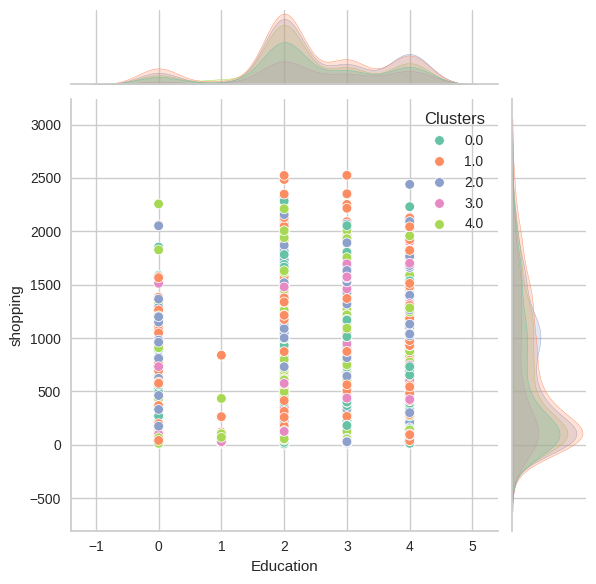

<Figure size 800x550 with 0 Axes>

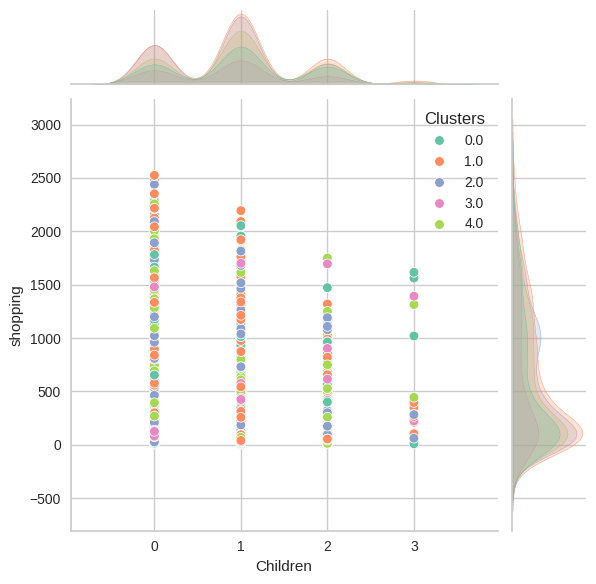

<Figure size 800x550 with 0 Axes>

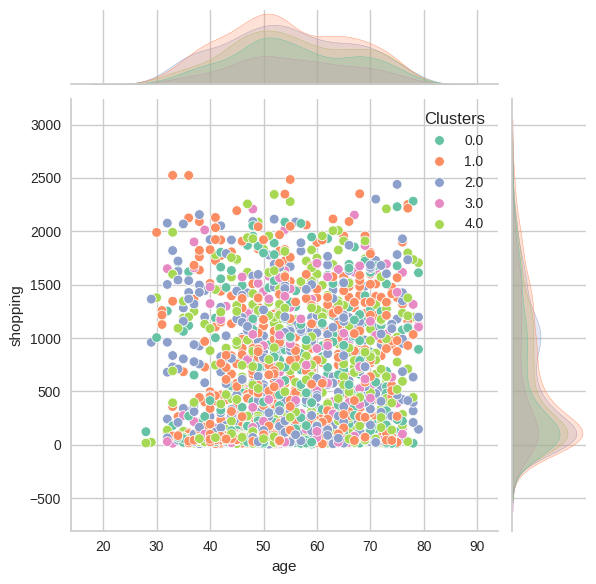

<Figure size 800x550 with 0 Axes>

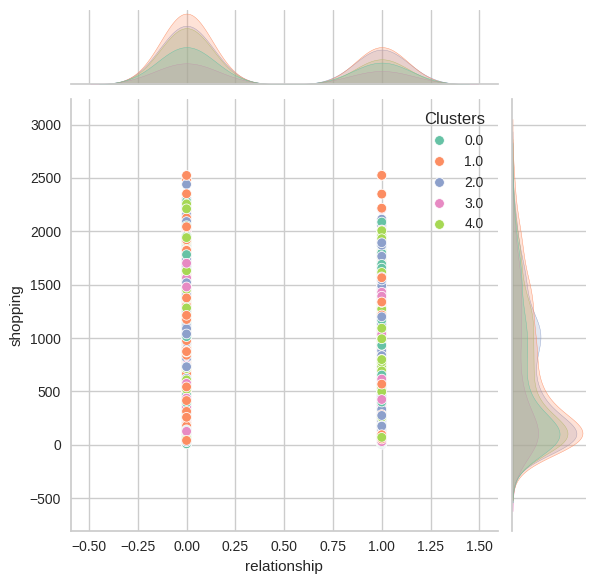

<Figure size 800x550 with 0 Axes>

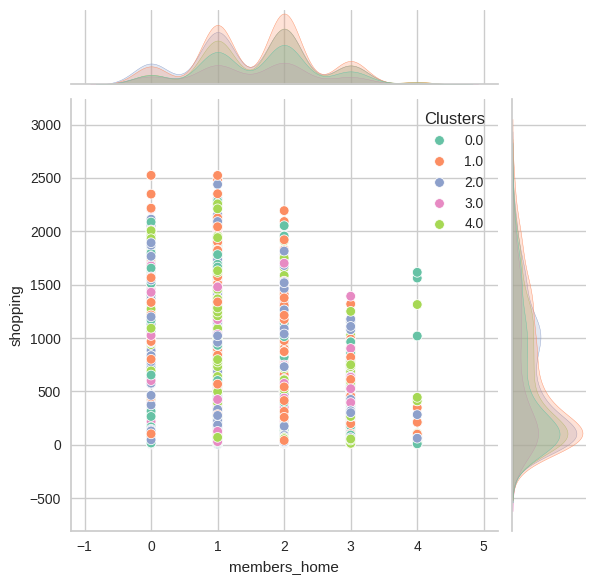

<Figure size 800x550 with 0 Axes>

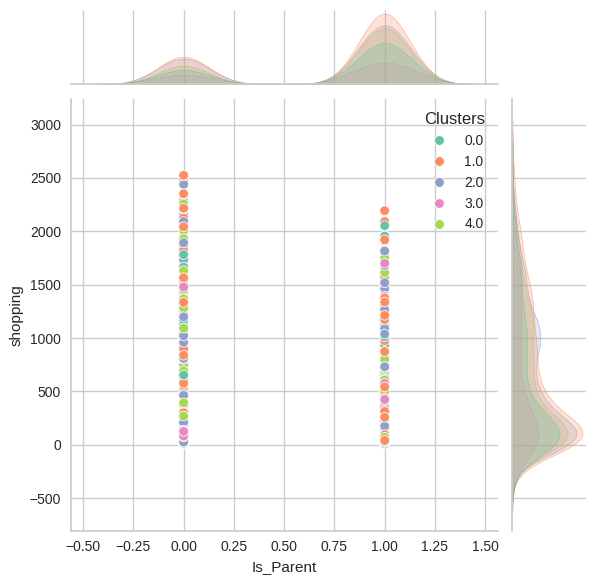

In [ ]:
Personal = [ "Education", "Children", "age","relationship","members_home","Is_Parent"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["shopping"], hue =result_data['Clusters'], kind="scatter",palette='Set2')
    plt.show()